# ***Assignment 2*** 

## 1. Importing Libraries and defining helpful functions.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Defining fucntion for normalization.

In [54]:
def normalize(X:np.ndarray):
    return (X - X.min()) / (X.max() - X.min())

Defining function for standardization.

In [55]:
def standardize(X:np.ndarray):
    return (X - X.mean()) / X.std()

Defining sigmoid function.

In [56]:
def sigmoid(z:np.ndarray):
    return (1 + np.exp(-z))**(-1)

Defining the cost function.

In [57]:
def costFunction(y:np.ndarray, predictions:np.ndarray):
    # y and predicitons are column matrices
    return ((y - predictions)**2).sum()

Defining function to predict probabilities.

In [58]:
def predictProbablities(X:np.ndarray, b0:float, b1:float):
    return sigmoid(b0 + (X.reshape((-1,1)) @ np.array([[b1]])))

Defining function to check Accuracy.

In [59]:
def checkAccuracy(y_original:np.ndarray, y_predicted:np.ndarray):
    accuracy = 0
    for idx, y in enumerate(y_predicted):
        if y == y_original[idx]:
            accuracy += 1
    return (accuracy/y_original.size)*100

## 2. Defining Algorithms for scratch and sklearn.

Defining logistic regression algorithm from scratch.

In [60]:
def logisticRegressionScratch(X:np.ndarray, y:np.ndarray, learning_rates:tuple, num_iterations:np.int64, initial_b0:np.float64=0, initial_b1:np.float64=1):
    # X and y are column matrices
    m = X.size
    # X = np.hstack( (np.ones((m,1)), X) )
    # taking note of history
    epochs = np.arange(1,num_iterations+1)
    cost_history = []
    # taking the steps
    for epoch in epochs:
        # finding probabilities
        predictions = predictProbablities(X, initial_b0, initial_b1)
        cost_history.append(costFunction(y, predictions))
        # setting 0.5 as the threshhold
        # predictions = np.array([1 if p > 0.5 else 0 for p in predictions])
        # finding gradient
        D_b0 = -2 * ( (y - predictions) * predictions * (1 - predictions) ).sum()
        D_b1 = -2 * ( (y - predictions) * predictions * (1 - predictions) * X).sum()
        initial_b0 -= learning_rates[0]*D_b0
        initial_b1 -= learning_rates[1]*D_b1

    return initial_b0, initial_b1, epochs, cost_history

Defining logistic regression algorithm from sklearn.

In [61]:
def logisticRegressionSklearn(X_train:np.ndarray, y_train:np.ndarray, X_test:np.ndarray):
    # create an instance and fit the model
    lr_model = LogisticRegression()
    lr_model.fit(X = X_train, y = y_train.reshape(-1))

    # make predictions
    predictions = lr_model.predict(X_test)
    
    return predictions

## 3. Loading data and making it ready.

Loading the Data

In [62]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Splitting the data into 70:30

In [63]:
X_train, X_test, y_train, y_test = tuple(map(np.array, train_test_split(df['Age'], df['Purchased'], random_state=1, test_size=0.30)))
X_train = np.array(X_train).reshape((-1, 1))
y_train = np.array(y_train).reshape((-1, 1))
X_test = np.array(X_test).reshape((-1, 1))
y_test = np.array(y_test).reshape((-1, 1))

Normalizing and Standardizing it.

In [64]:
X_train_norm = normalize(X_train)
y_train_norm = normalize(y_train)
X_test_norm = normalize(X_test)
y_test_norm = normalize(y_test)

X_train_stand = standardize(X_train)
y_train_stand = standardize(y_train)
X_test_stand = standardize(X_test)
y_test_stand = standardize(y_test)

# Implementing logistic regression for <ins>raw data</ins> by <ins>scratch<ins>.

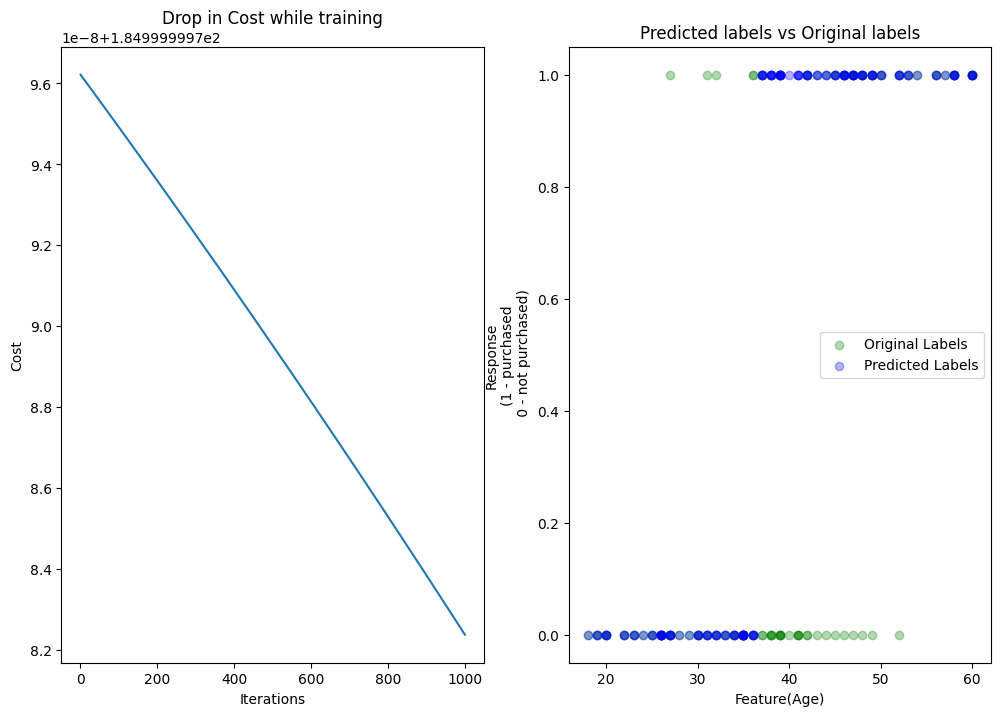

In [65]:
b0_raw_scratch, b1_raw_scratch, epochs1, cost_history1 = logisticRegressionScratch(X=X_train, y=y_train, learning_rates=(0.9, 0.9), num_iterations=1000)

plt.figure(figsize=(12,8))
# plotting cost vs epochs
plt.subplot(1,2,1)
plt.plot(epochs1 , cost_history1)
plt.title('Drop in Cost while training')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# plotting the test data along with the predicted values
predicted_raw_scratch = predictProbablities(X_test, b0_raw_scratch, b1_raw_scratch)
predicted_raw_scratch = np.array([ 1 if p>0.999999999999999944485 else 0 for p in predicted_raw_scratch])
plt.subplot(1,2,2)
plt.scatter(X_test , y_test, c='green', alpha=0.3)
plt.scatter(X_test, predicted_raw_scratch, c='blue', alpha=0.3)
plt.legend(('Original Labels', 'Predicted Labels'))
plt.title('Predicted labels vs Original labels')
plt.xlabel('Feature(Age)')
plt.ylabel('Response\n(1 - purchased\n 0 - not purchased)')
plt.show()

## Impplementing logistic regression for <ins>normalized data</ins> by <ins>scratch</ins>.

-5.160135614838818 8.694408784723601


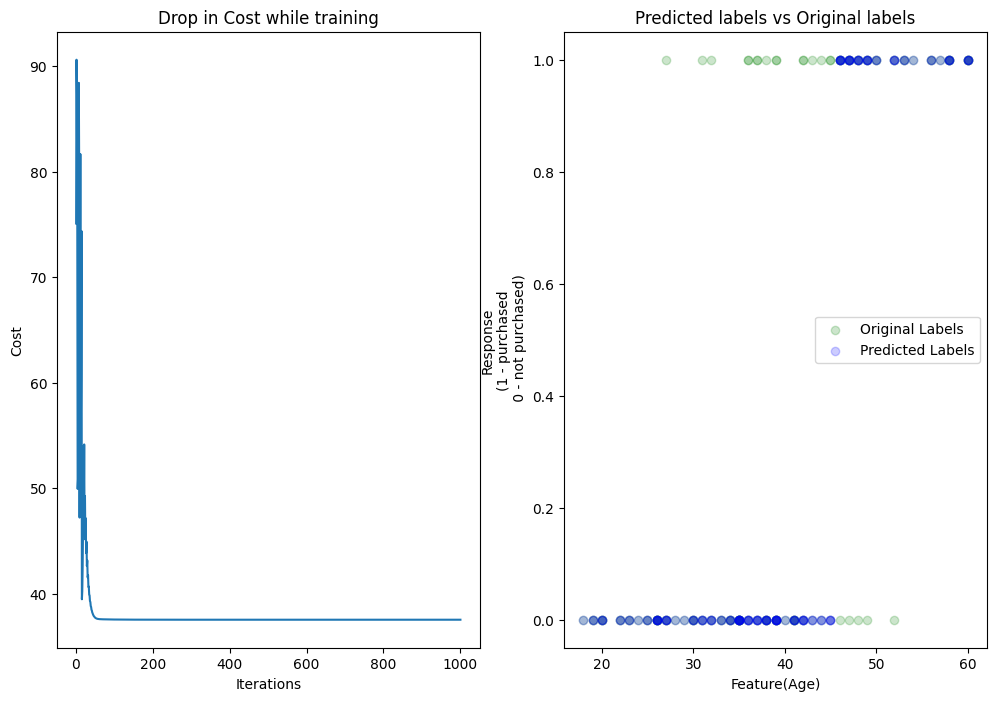

In [66]:
b0_norm_scratch, b1_norm_scratch, epochs2, cost_history2 = logisticRegressionScratch(X=X_train_norm, y=y_train_norm, learning_rates=(0.1, 0.1), num_iterations=1000)

plt.figure(figsize=(12,8))
# plotting cost vs epochs
plt.subplot(1,2,1)
plt.plot(epochs2 , cost_history2)
plt.title('Drop in Cost while training')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# plotting the test data along with the predicted values
predicted_norm_scratch = predictProbablities(X_test_norm, b0_norm_scratch, b1_norm_scratch)
predicted_norm_scratch = np.array([ 1 if p > sigmoid(0.5) else 0 for p in predicted_norm_scratch])
plt.subplot(1,2,2)
plt.scatter(X_test , y_test, c='green', alpha=0.2)
plt.scatter(X_test, predicted_norm_scratch, c='blue', alpha=0.2)
plt.legend(('Original Labels', 'Predicted Labels'))
plt.title('Predicted labels vs Original labels')
plt.xlabel('Feature(Age)')
plt.ylabel('Response\n(1 - purchased\n 0 - not purchased)')
plt.show()

## Impplementing logistic regression for <ins>standardized data</ins> by <ins>scratch</ins>.

-10.80738034034567 18.304586688470895


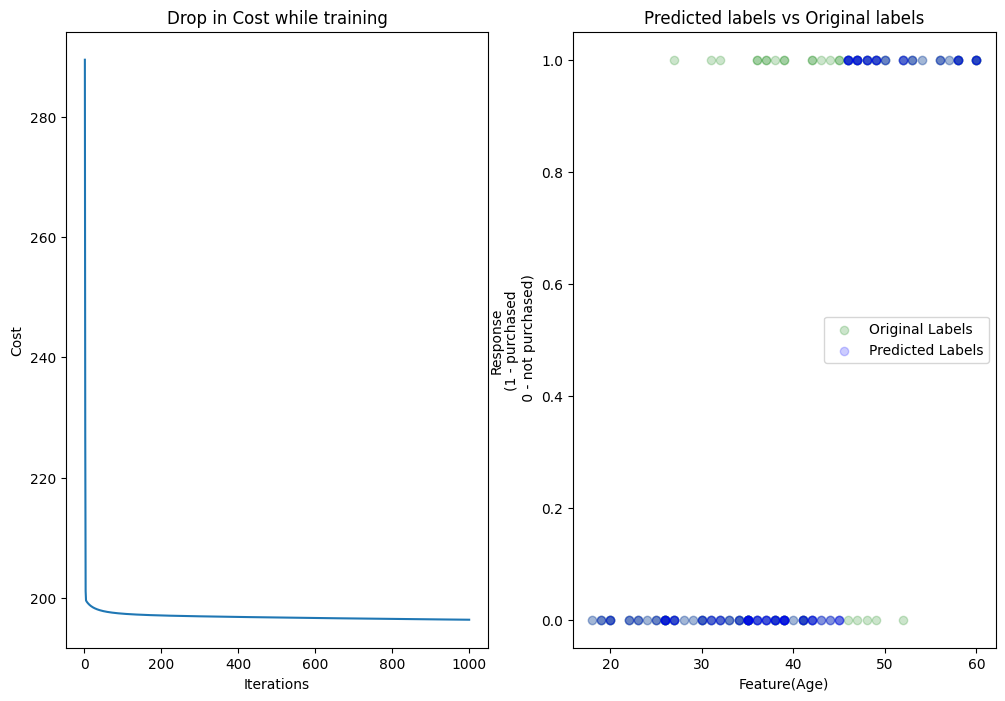

In [67]:
b0_stand_scratch, b1_stand_scratch, epochs3, cost_history3 = logisticRegressionScratch(X=X_train_stand, y=y_train_stand, learning_rates=(0.1, 0.1), num_iterations=1000)

plt.figure(figsize=(12,8))
# plotting cost vs epochs
plt.subplot(1,2,1)
plt.plot(epochs3 , cost_history3)
plt.title('Drop in Cost while training')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# plotting the test data along with the predicted values
predicted_stand_scratch = predictProbablities(X_test_stand, b0_stand_scratch, b1_stand_scratch)
predicted_stand_scratch = np.array([ 1 if p > 0.5 else 0 for p in predicted_stand_scratch])
plt.subplot(1,2,2)
plt.scatter(X_test , y_test, c='green', alpha=0.2)
plt.scatter(X_test, predicted_stand_scratch, c='blue', alpha=0.2)
plt.legend(('Original Labels', 'Predicted Labels'))
plt.title('Predicted labels vs Original labels')
plt.xlabel('Feature(Age)')
plt.ylabel('Response\n(1 - purchased\n 0 - not purchased)')
plt.show()

## Implementing logistic regression for <ins>raw data</ins> by <ins>sklearn</ins>.

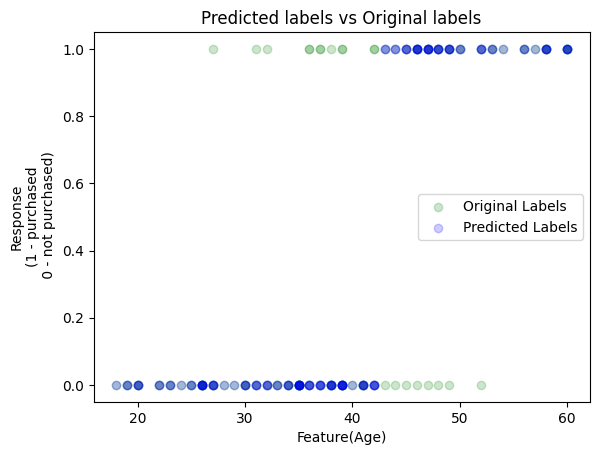

In [68]:
predicted_raw_sklearn = logisticRegressionSklearn(X_train=X_train, y_train=y_train, X_test=X_test)

plt.scatter(X_test , y_test, c='green', alpha=0.2)
plt.scatter(X_test, predicted_raw_sklearn, c='blue', alpha=0.2)
plt.legend(('Original Labels', 'Predicted Labels'))
plt.title('Predicted labels vs Original labels')
plt.xlabel('Feature(Age)')
plt.ylabel('Response\n(1 - purchased\n 0 - not purchased)')
plt.show()

## Checking accuracies

In [71]:
accuracy_raw_scratch = checkAccuracy(y_test, predicted_raw_scratch)
accuracy_norm_scratch = checkAccuracy(y_test, predicted_norm_scratch)
accuracy_stand_scratch = checkAccuracy(y_test, predicted_stand_scratch)
accuracy_raw_sklearn = checkAccuracy(y_test, predicted_raw_sklearn)

print(f"""
Accuracy of Scratch Model on Raw data: {accuracy_raw_scratch}
Accuracy of Scratch Model on Normalized data: {accuracy_norm_scratch}
Accuracy of Scratch Model on Standardized data: {accuracy_stand_scratch}

Accuracy of Sklearn Model on Raw Data: {accuracy_raw_sklearn}
""")


Accuracy of Scratch Model on Raw data: 74.16666666666667
Accuracy of Scratch Model on Normalized data: 82.5
Accuracy of Scratch Model on Standardized data: 82.5

Accuracy of Sklearn Model on Raw Data: 83.33333333333334



# ***SUMMARY***
1. Key points of using <ins>Scratch Model</ins>:
    - Using *raw data* with Scratch model gives *<ins>very very low cost decline</ins>*.
    - Also we need to set up *<ins>very very precise threshold</ins>* because the sigmoid function returns values very very close to 1 as a result of not normalising the dataset.
    - Using *normalised* and *standardised* data with Scratch results in almost similar accuracy as given by the *Sklearn* model.
2. Key points of using <ins>Sklearn Model</ins>:
    - You do not have to normalise or standardise data in Sklearn's inbuilt model.
3. Note \:- The Loss function is <ins>L2 Loss function here</ins> and not the usual binary cross entropy loss function.